In [126]:
# Import the libraries we need.
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import emcee
import george
from george import kernels
from george.modeling import Model
from matplotlib.ticker import AutoMinorLocator

colours = ['orange','forestgreen','plum','blue','cyan','red','lime','purple','cyan',\
           'pink','darkgreen','rosybrown','maroon',\
          'magenta','olive','peru','yellow','darkblue',\
           'fuchsia','crimson']

plt.rc('text',usetex=True)
plt.rc('font', size=40)
plt.rc('font', weight='bold')
plt.rc('font', family='serif')          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=40)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)    # fontsize of the tick labels
plt.rc('ytick', labelsize=30)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.rc('ytick', direction='in')
plt.rc('xtick', direction='in')
plt.rc('xtick.major',size=10)
plt.rc('ytick.major',size=10)
plt.rc('xtick.minor',size=5)
plt.rc('ytick.minor',size=5)

In [127]:
def get_covF_fromM(covM):
    covF = [[]]
    #index=0 #basically delta_t=0,1,..,N-1 
    for ir in range(covM.shape[0]): # each delta in the function
        for i in range(covM.shape[0]): #each row in the matrix
                if i-ir >=0:
                    covF[ir].append(covM[i][i-ir])
                if i+ir <covM.shape[0]:
                    covF[ir].append(covM[i][i+ir])
        #covF[index] = np.array(covF[index])
        if ir < covM.shape[0]-1:
            covF.append([])

        #print i,j
            #icovF = cov[i][]

    covF = np.array(covF)
    covF_mean = np.empty(len(covF))
    for i in range(len(covF)):
        covF_mean[i] = np.mean(covF[i])
    return covF_mean

In [159]:
def get_samples_simpleKernel(x,params,kernel_type = 'ExpSquared',Nsamples=5):
    if kernel_type == 'ExpSquared':
        amp = (params[0])
        metr = (params[1])
        kernel = amp * kernels.ExpSquaredKernel(metric=metr)
        covM = kernel.get_value(np.atleast_2d(x).T)
        covF = amp * np.exp(-x**2/(2.*metr))
        # m is the equivalent of sigma^2 in a gaussian
        # i.e. exp(-x^2/2m)
        gp = george.GP(kernel)
        gp.compute(x)
        y = gp.sample(x,size=Nsamples)
    elif kernel_type == 'Matern52Kernel':
        print ('TODO')
    return y,covF,covM

# use the more general approach:
def get_samples_kernel(x,kernel,Nsamples=5):
    covM = kernel.get_value(np.atleast_2d(x).T)
    covF = get_covF_fromM(covM)
    gp = george.GP(kernel)
    gp.compute(x)
    y = gp.sample(x,size=Nsamples)
    return y,covF,covM

def plot_samples(x,y,covF,covM,filesave='Test.png'):
    plt.figure(figsize=(27,8))
    plt.subplot(132)
    plt.plot(x,covF,'-k')
    plt.xlabel('x',fontsize=20)
    plt.ylabel('Cov Function',fontsize=20)

    plt.subplot(122)
    try:
        y.shape[1]

        for i in range(y.shape[0]):
            plt.plot(x,y[i],'-',linewidth=3)
    except:
        plt.plot(x,y,'-',linewidth=3)
        
    plt.xlabel('x',fontsize=20)
    plt.ylabel('y',fontsize=20)

    plt.subplot(121)
    im=plt.imshow(covM)
    plt.colorbar(im,fraction=0.046, pad=0.04)
    plt.title('Cov Matrix')

    plt.tight_layout()
    plt.savefig(filesave)
    plt.show()

def plot_samples2(x,y,covF,covM,filesave='Test.png', vlines=False):
    fig,axs = plt.subplots(1, 2,figsize=(18,6), constrained_layout=True)
    
    axs[0].plot(x,covF,'-k')
    axs[0].set_xlabel('t',fontsize=40)
    axs[0].set_ylabel('k',fontsize=40)

    
    try:
        y.shape[1]

        for i in range(y.shape[0]):
            axs[1].plot(x,y[i],'-',linewidth=3)
    except:
        axs[1].plot(x,y,'-',linewidth=3)
        
    axs[1].set_xlabel('t',fontsize=40)
    axs[1].set_ylabel('y',fontsize=40)

    if vlines:
        ntot = int(x.max()/10 + 1)
        print(ntot)
        for i in range(ntot):
            axs[1].axvline(x.min()+i*10)
        
    plt.savefig(filesave)
    plt.show()
    
    

In [129]:
x = np.linspace(0,100,1000)
amp=0.1
metr=50

In [156]:
x

array([  0.        ,   0.1001001 ,   0.2002002 ,   0.3003003 ,
         0.4004004 ,   0.5005005 ,   0.6006006 ,   0.7007007 ,
         0.8008008 ,   0.9009009 ,   1.001001  ,   1.1011011 ,
         1.2012012 ,   1.3013013 ,   1.4014014 ,   1.5015015 ,
         1.6016016 ,   1.7017017 ,   1.8018018 ,   1.9019019 ,
         2.002002  ,   2.1021021 ,   2.2022022 ,   2.3023023 ,
         2.4024024 ,   2.5025025 ,   2.6026026 ,   2.7027027 ,
         2.8028028 ,   2.9029029 ,   3.003003  ,   3.1031031 ,
         3.2032032 ,   3.3033033 ,   3.4034034 ,   3.5035035 ,
         3.6036036 ,   3.7037037 ,   3.8038038 ,   3.9039039 ,
         4.004004  ,   4.1041041 ,   4.2042042 ,   4.3043043 ,
         4.4044044 ,   4.5045045 ,   4.6046046 ,   4.7047047 ,
         4.8048048 ,   4.9049049 ,   5.00500501,   5.10510511,
         5.20520521,   5.30530531,   5.40540541,   5.50550551,
         5.60560561,   5.70570571,   5.80580581,   5.90590591,
         6.00600601,   6.10610611,   6.20620621,   6.30

In [140]:
kern_ES = amp * kernels.ExpSquaredKernel(metric=100)
y_ES,covF_ES,covM_ES = get_samples_kernel(x,kern_ES,Nsamples=2)

/home/mbcx4in2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


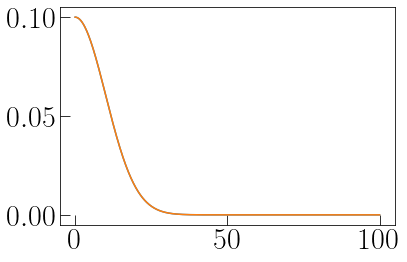

In [142]:
plt.plot(x, np.exp(-x*x/2/100)/10)
plt.plot(x, covF_ES)

11


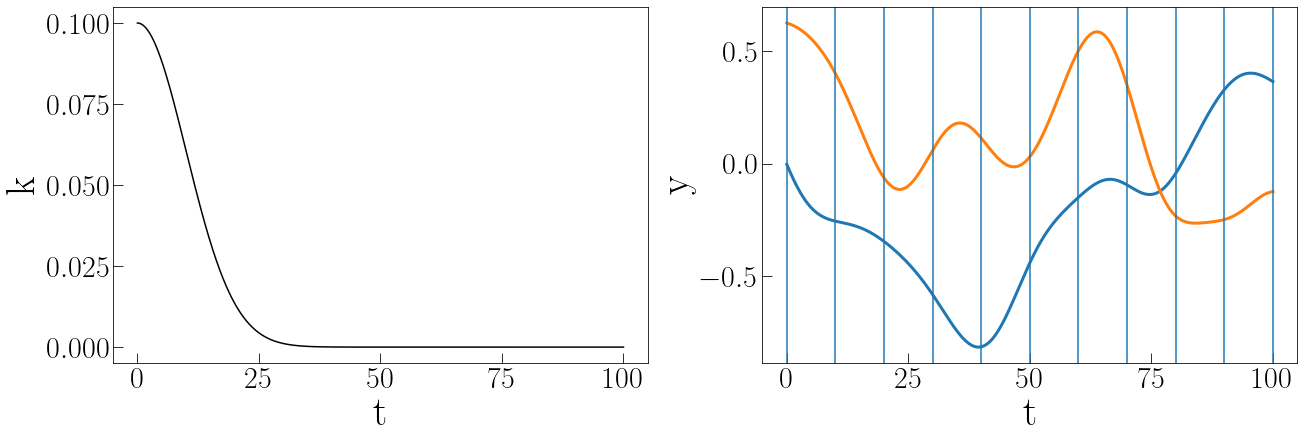

In [160]:
# plot_samples2(x,y_ES,covF_ES,covM_ES,'Samples_ESq_Kernel.png')
plot_samples2(x,y_ES,covF_ES,covM_ES,'test.png', vlines=True)

/home/mbcx4in2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


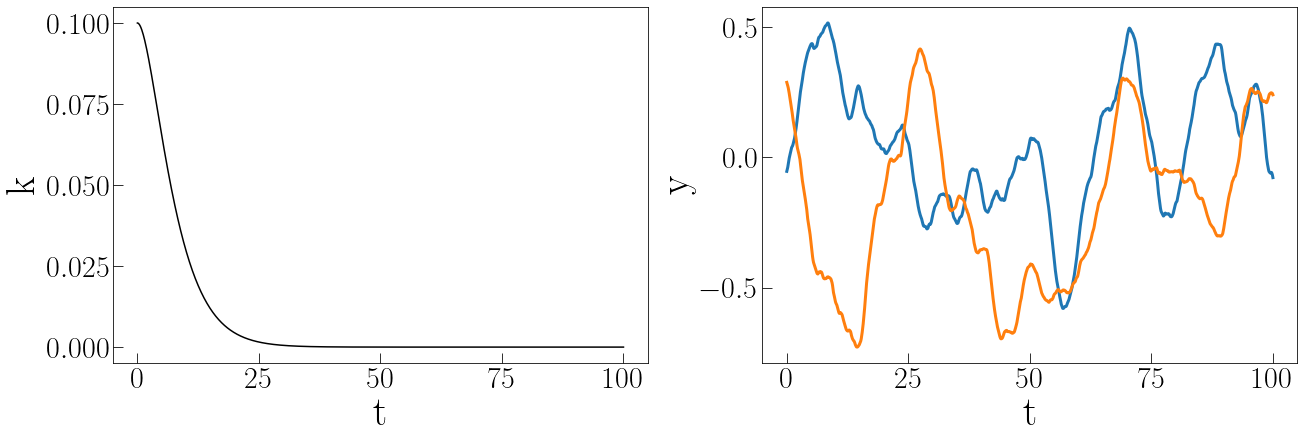

In [8]:
kern_M32 = amp * kernels.Matern32Kernel(metric=50)
y_M32,covF_M32,covM_M32 = get_samples_kernel(x,kern_M32,Nsamples=2)
plot_samples2(x,y_M32,covF_M32,covM_M32,'Samples_M32_Kernel.png')

/home/mbcx4in2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


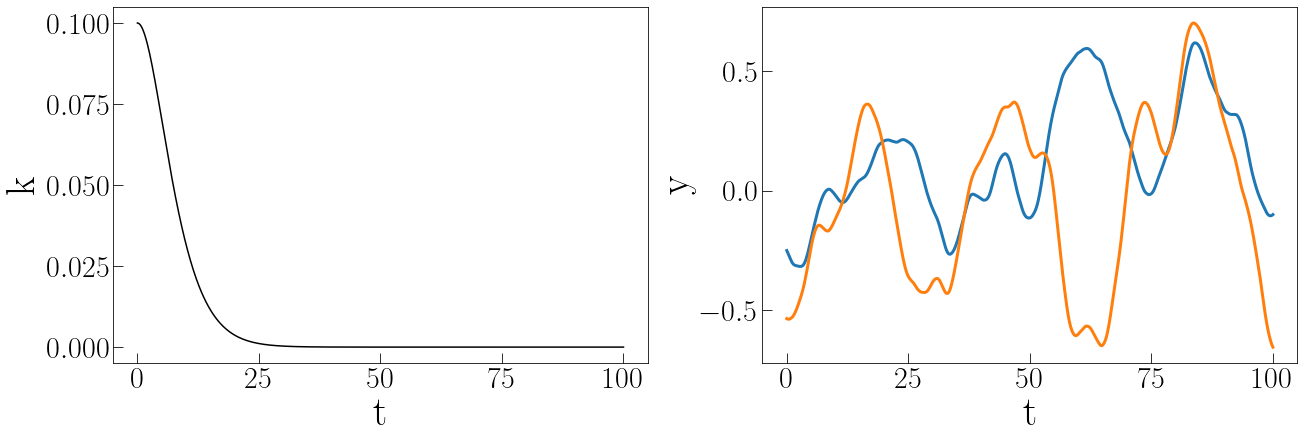

In [10]:
kern_M52 = amp * kernels.Matern52Kernel(metric=50)
y_M52,covF_M52,covM_M52 = get_samples_kernel(x,kern_M52,Nsamples=2)
plot_samples2(x,y_M52,covF_M52,covM_M52,'Samples_M52_Kernel.png')

/home/mbcx4in2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


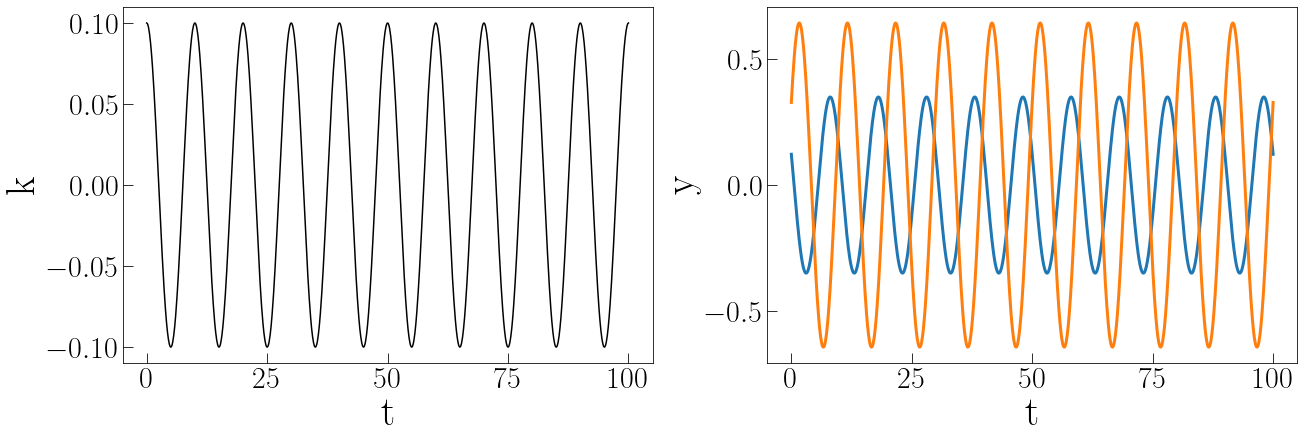

In [88]:
kern_cos = amp * kernels.CosineKernel(log_period = np.log(10))
y_cos,covF_cos,covM_cos = get_samples_kernel(x,kern_cos,Nsamples=2)
plot_samples2(x,y_cos,covF_cos,covM_cos,'Samples_cos_Kernel.png')

In [19]:
kern_cos = amp * kernels.CosineKernel(log_period = np.log(10))
kern_ES = 10*amp * kernels.ExpSquaredKernel(metric=50)

kern_cosES = kern_ES * kern_cos # or +
y_cosES,covF_cosES,covM_cosES = get_samples_kernel(x,kern_cosES,Nsamples=1)
yint = np.cumsum(np.cumsum(y_cosES))

#plot_samples(x,y_cosES,covF_cosES,covM_cosES,'Samples_CosES_Kernel_p5_m20.png')
#plt.figure()
#plt.plot(x,yint)

/home/mbcx4in2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


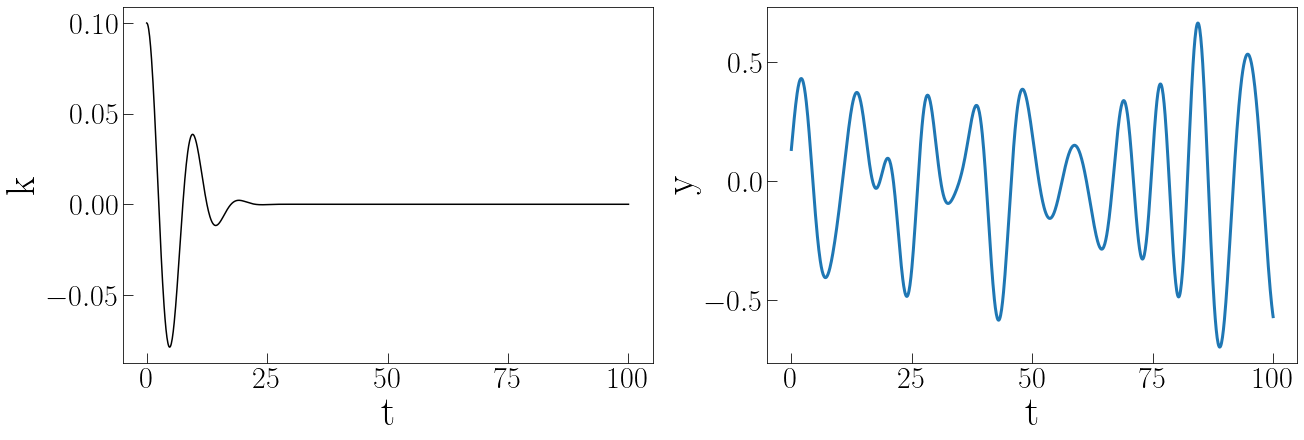

In [20]:
plot_samples2(x,y_cosES,covF_cosES,covM_cosES,'Samples_CosES_Kernel.png')

In [ ]:
kern_cos = amp * kernels.CosineKernel(log_period = np.log(10))
kern_M32 = 10*amp * kernels.Matern32Kernel(metric=50)

kern_cosES = kern_ES * kern_cos # or +
y_cosES,covF_cosES,covM_cosES = get_samples_kernel(x,kern_cosES,Nsamples=1)
plot_samples2(x,y_cosES,covF_cosES,covM_cosES,'test.png')

In [112]:
kern_ESin2 = amp* kernels.ExpSine2Kernel(gamma=10,log_period=np.log(20))
y_ESin2,covF_ESin2,covM_ESin2 = get_samples_kernel(x,kern_ESin2,Nsamples=2)

/home/mbcx4in2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


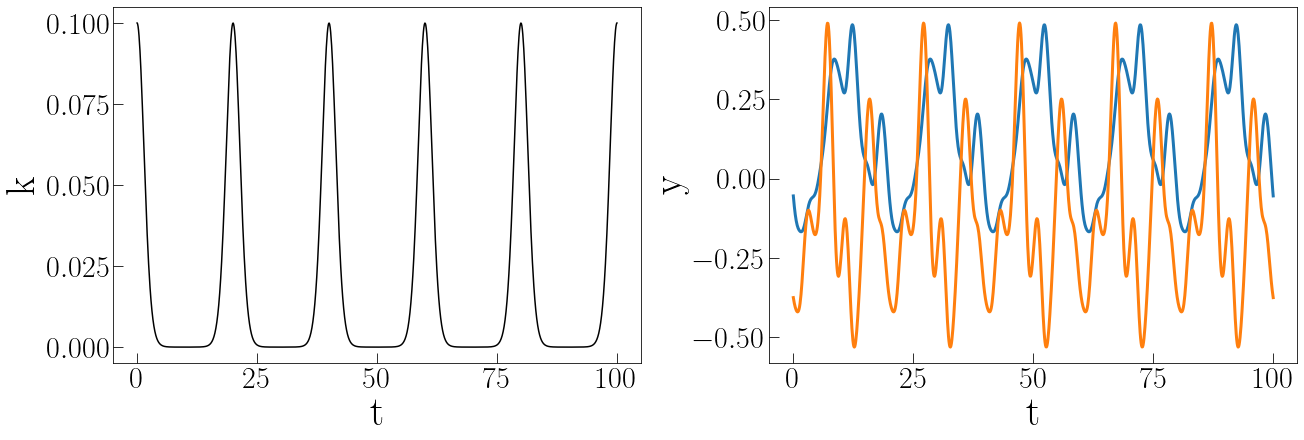

In [113]:
plot_samples2(x,y_ESin2,covF_ESin2,covM_ESin2,'Samples_ExpSin2_Kernel.png')

In [73]:
kern_ESin2 = amp* kernels.ExpSine2Kernel(gamma=10, log_period=np.log(10))
kern_ES = amp*10 * kernels.ExpSquaredKernel(metric=1000)

kern_ESESin2 = kern_ES * kern_ESin2
y_ESESin2,covF_ESESin2,covM_ESESin2 = get_samples_kernel(x,kern_ESESin2,Nsamples=1)

/home/mbcx4in2/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


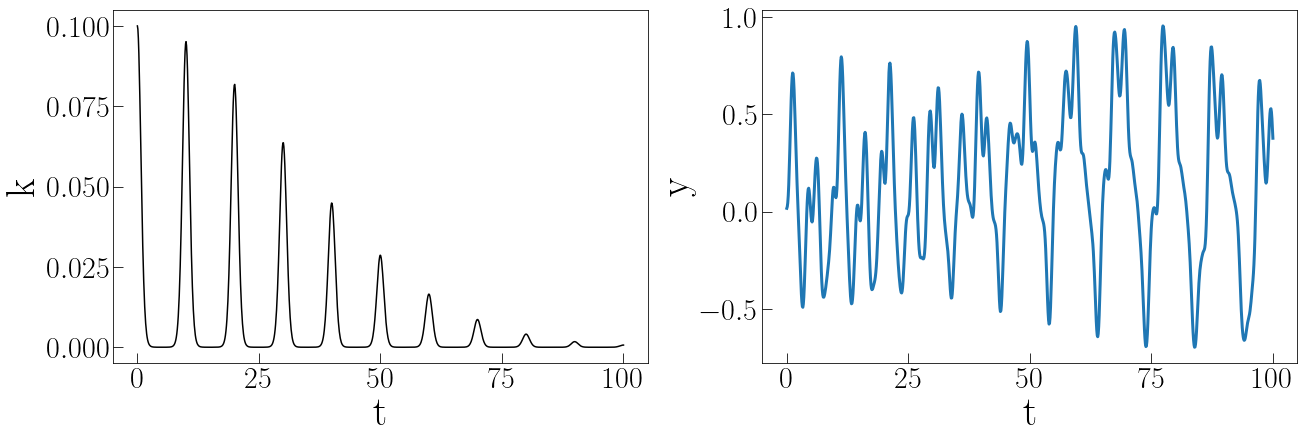

In [74]:
plot_samples2(x,y_ESESin2,covF_ESESin2,covM_ESESin2,'Samples_ESESin2_Kernel.png')

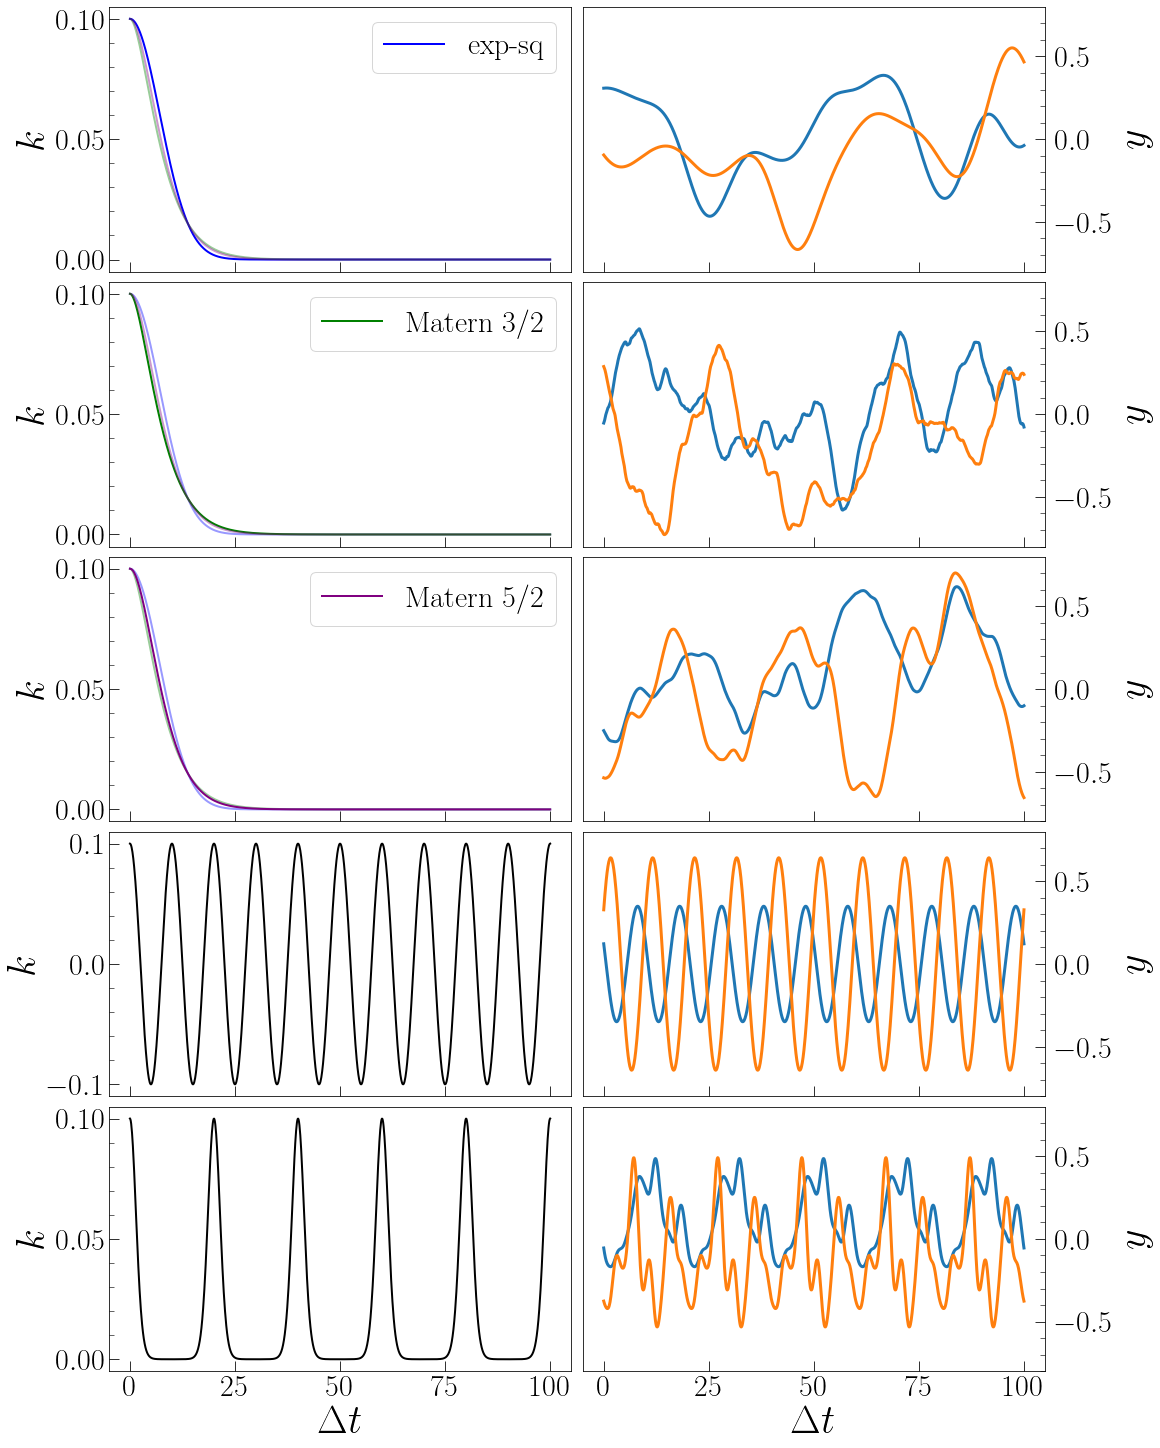

In [125]:
fig, axs = plt.subplots(5, 2, figsize=(16,20), constrained_layout=True, sharex=True)

axs[2,0].plot(x, covF_ES, ls='-', color='blue', linewidth=2, alpha=0.4)
axs[1,0].plot(x, covF_ES, ls='-', color='blue', linewidth=2, alpha=0.4)
axs[0,0].plot(x, covF_ES, ls='-', color='blue', linewidth=2, label='exp-sq')
axs[0,0].legend(loc='upper right', fontsize=30)
try:
    y_ES.shape[1]

    for i in range(y_ES.shape[0]):
        axs[0,1].plot(x,y_ES[i],'-',linewidth=3)
except:
    axs[0,1].plot(x,y_ES,'-',linewidth=3)
    
    
axs[0,0].plot(x, covF_M32, ls='-', color='green', linewidth=2, alpha=0.4)
axs[2,0].plot(x, covF_M32, ls='-', color='green', linewidth=2, alpha=0.4)
axs[1,0].plot(x, covF_M32, ls='-', color='green', linewidth=2, label='Matern 3/2')
axs[1,0].legend(loc='upper right', fontsize=30)

try:
    y_M32.shape[1]

    for i in range(y_M32.shape[0]):
        axs[1,1].plot(x,y_M32[i],'-',linewidth=3)
except:
    axs[1,1].plot(x,y_M32,'-',linewidth=3)
    
axs[0,0].plot(x, covF_M52, ls='-', color='purple', linewidth=2, alpha=0.4)
axs[1,0].plot(x, covF_M52, ls='-', color='purple', linewidth=2, alpha=0.4)
axs[2,0].plot(x, covF_M52, ls='-', color='purple', linewidth=2, label='Matern 5/2')
axs[2,0].legend(loc='upper right', fontsize=30)

try:
    y_M52.shape[1]

    for i in range(y_M52.shape[0]):
        axs[2,1].plot(x,y_M52[i],'-',linewidth=3)
except:
    axs[2,1].plot(x,y_M52,'-',linewidth=3)
    
    
axs[3,0].plot(x, covF_cos, ls='-', color='black', linewidth=2, label='cos')
# axs[3,0].legend(loc='upper right', fontsize=30)

try:
    y_cos.shape[1]

    for i in range(y_cos.shape[0]):
        axs[3,1].plot(x,y_cos[i],'-',linewidth=3)
except:
    axs[3,1].plot(x,y_cos,'-',linewidth=3)
    
axs[4,0].plot(x, covF_ESin2, ls='-', color='black', linewidth=2, label='exp-sin-sq')
# axs[4,0].legend(loc='upper right', fontsize=30)

try:
    y_ESin2.shape[1]

    for i in range(y_ESin2.shape[0]):
        axs[4,1].plot(x,y_ESin2[i],'-',linewidth=3)
except:
    axs[4,1].plot(x,y_ESin2,'-',linewidth=3)
    
    
for ax in axs:
    ax[0].set_ylabel('$k$')
    ax[1].yaxis.set_label_position('right')
#     ax[1].tick_params(left=False)#, right=True)
    ax[1].yaxis.tick_right()
    ax[1].set_ylabel('$y$')
    ax[1].set_ylim(-0.8, 0.8)#, minor=True)
#     ax[0].set_ylim(-0.01, 0.11)
    ax[0].set_yticks([0.00, 0.05, 0.1], minor=True)
    ax[0].yaxis.set_minor_locator(AutoMinorLocator())
    ax[1].yaxis.set_minor_locator(AutoMinorLocator())
    ax[1].tick_params(axis='y', which='major', pad=10)
    
    
axs[-1,0].set_xlabel('$\Delta t$')
axs[-1,1].set_xlabel('$\Delta t$')

plt.savefig('Samples_from_kernels_simple.pdf')
plt.show()